# Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

In [3]:
%matplotlib inline

# load binary classification dataset

In [5]:
df=pd.read_csv('DataSets/4.Classification-Pollution_dataset-9i & 4or2 o.csv')

In [6]:
# ignore Air Quality & use Binaary_Class as Target
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Binaary_Class
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,Good
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,Good
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,Good
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,Good


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
 10  Binaary_Class                  5000 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


### Apply Label Encoder 

In [9]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [10]:
# Apply Label Encoding to 'Color' column
df['Binaary_Class'] = label_encoder.fit_transform(df['Binaary_Class'])

### Split the dataset into training and testing sets (80% train, 20% test)

In [12]:
X=df.drop(columns=['Air Quality','Binaary_Class'],axis=1,inplace=False)
y=df['Binaary_Class']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Define the Logistic Regression model

In [15]:
# Set max_iter to 1000 for convergence
model = LogisticRegression(max_iter=1000)  

### Train the model

In [17]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Make predictions on the test set

In [19]:
y_pred = model.predict(X_test)

# Evaluate the model's performance

In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print('-'*55)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print('-'*55)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

print('-'*55)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.4f}")


Accuracy: 0.9730
-------------------------------------------------------
Confusion Matrix:
[[282  15]
 [ 12 691]]
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       297
           1       0.98      0.98      0.98       703

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

-------------------------------------------------------
ROC-AUC: 0.9964


In [22]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

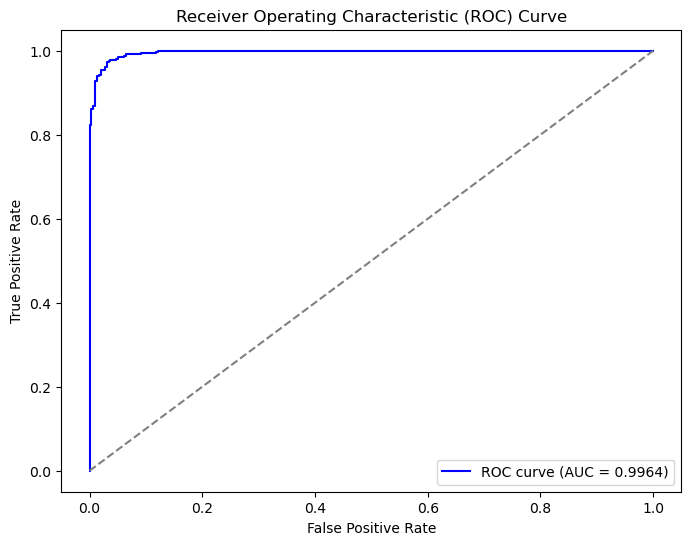

In [23]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()